In [2]:
import os
import random
import seaborn as sns
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_digits
from sklearn import datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as tt

In [3]:
class SimpleGaussianMixture(object):

  def __init__(self, mixture_weights, mixture_components):
    self.mixture_weights = mixture_weights
    self.mixture_components = mixture_components

  def sample(self, num_samples, sample_seed=None):
    if(sample_seed):
        np.random.seed(seed=sample_seed)
        torch.random.manual_seed(seed=sample_seed)
    # First sample from the mixture
    mixture_choices = torch.multinomial(input=self.mixture_weights, num_samples=num_samples, replacement=True)
    # And then sample from the chosen mixture
    samples = torch.from_numpy(np.array(
          [self.mixture_components[mixture_choice].rvs(size=1)
           for mixture_choice in mixture_choices]))
    return mixture_choices, torch.squeeze(samples,1)

  def pdf(self, x):
    value = 0.
    for index, weight in enumerate(self.mixture_weights):
      # Assuming using scipy distributions for components
      value += weight * self.mixture_components[index].pdf(x)
    return value

In [13]:
D = 2
n_samples = 10000
n_components = 2
#mix = 0.4
mix = torch.randn(n_components, dtype=torch.float)
softmax = torch.nn.Softmax(dim = 0)
mixture_weight = softmax(mix)
mean_high = 5
var_multiplier = 0.2
degree_freedom = 50

In [14]:
mixture_weight

tensor([0.7144, 0.2856])

In [40]:
gaussian_mixture_components = []
for n in range(n_components):
    Sigma_k = torch.rand(D, D)
    Sigma_k = torch.mm(Sigma_k, Sigma_k.t())
    Sigma_k.add_(torch.eye(D)*var_multiplier)
    mean_k = torch.randint(high=mean_high,size=(D,), dtype=torch.float)
    gaussian_mixture_components.append(scipy.stats.multivariate_normal(mean=mean_k,cov=Sigma_k))

In [4]:
t_mixture_components = []
for n in range(n_components):
    Sigma_k = torch.rand(D, D)
    Sigma_k = torch.mm(Sigma_k, Sigma_k.t())
    Sigma_k.add_(torch.eye(D)*var_multiplier)
    mean_k = torch.randint(high=mean_high,size=(D,), dtype=torch.float)
    t_mixture_components.append(scipy.stats.multivariate_t(loc=mean_k,shape=Sigma_k,df=degree_freedom))

In [15]:
#mixture_components = [scipy.stats.norm(loc=-1, scale=0.1), scipy.stats.norm(loc=1, scale=0.5)]
mixture_components = [scipy.stats.multivariate_normal(mean=[-1,-1],cov=[[0.05, 0], [0, 0.15]]), scipy.stats.multivariate_normal(mean=[1,0],cov=[[0.1, 0], [0, 0.2]])]
gaussian_mixture_train = SimpleGaussianMixture(mixture_weight, mixture_components)
gaussian_mixture_val = SimpleGaussianMixture(mixture_weight, mixture_components)

In [10]:
t_mixture_train = SimpleGaussianMixture(mixture_weight, t_mixture_components)

NameError: name 't_mixture_components' is not defined

In [16]:
text_classes , low_variance_gmm = gaussian_mixture_train.sample(n_samples)

In [17]:
low_variance_gmm

tensor([[ 0.9555,  0.1520],
        [ 0.1445,  0.7672],
        [ 0.8196, -0.2176],
        ...,
        [-0.7171, -1.5086],
        [ 0.7937, -0.3368],
        [ 1.3233, -0.7045]], dtype=torch.float64)

In [47]:
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
noise = 0.1
std=1

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8, cluster_std=std)[0]
no_structure = np.random.rand(n_samples, 2)

In [40]:
gaussian_mixture_components

In [17]:
test = scipy.stats.multivariate_normal(mean=[-1,-1],cov=[0.1,0.1])
test2 = scipy.stats.multivariate_normal(mean=[1,1],cov=[0.5,0.5])

In [16]:
test.rvs()

array([-1.17489628, -0.87210819])

In [18]:
test2.rvs()

array([0.97319982, 0.68502708])

In [6]:
text_classes , t_mixture_samples = t_mixture_train.sample(n_samples)

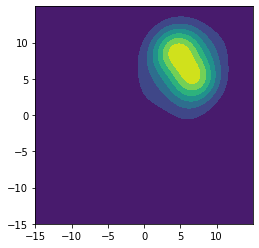

In [41]:
import matplotlib.pyplot as plt
x, y = np.mgrid[-15:15:.01, -15:15:.01]
pos = np.dstack((x, y))
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
plt.contourf(x, y, gaussian_mixture_train.pdf(pos))
#Renk değiştirilecek

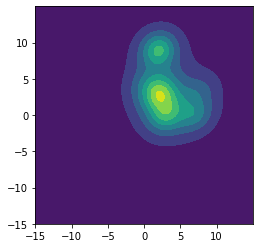

In [26]:
import matplotlib.pyplot as plt
x, y = np.mgrid[-15:15:.01, -15:15:.01]
pos = np.dstack((x, y))
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
plt.contourf(x, y, t_mixture_train.pdf(pos))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

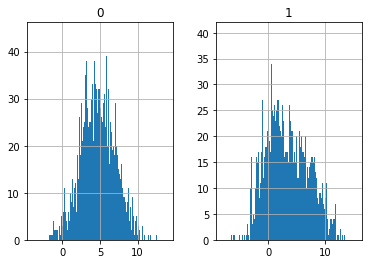

In [9]:
pd.DataFrame(test_sample_2).hist(bins=1000)

In [18]:
test_sample_2

tensor([[-1.1591, -0.6245],
        [ 1.3171, -0.5108],
        [-2.2207,  0.2148],
        ...,
        [ 1.5558,  2.2388],
        [-1.9082,  0.0549],
        [-2.3087, -2.6156]], dtype=torch.float64)

In [ ]:
from scipy.stats import multivariate_t
rv = multivariate_t([1.0, -0.5], [[2.1, 0.3], [0.3, 1.5]], df=2)

In [43]:
torch.save(low_variance_gmm, 'C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/2d_gmm_low_variance_test.pt')

In [48]:
torch.save(noisy_circles, 'C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_circles_low_noise_test.pt')

In [36]:
torch.save(blobs, 'C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/blobs_low_std_test.pt')

In [49]:
torch.save(noisy_moons, 'C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_moons_low_noise_test.pt')

In [7]:
torch.save(t_mixture_samples, 'C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/2d_t_mixture_low_variance.pt')

In [27]:
torch.save(no_structure, 'C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/no_structure_test.pt')

In [30]:
torch.save(text_classes, 'C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/1DGMM/validation_classes_2d.pt')

In [15]:
test_load = torch.load('C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/1DGMM/training_samples.pt')

In [19]:
test_load

tensor([ 0.7379,  0.9613, -1.0566,  ...,  1.5120,  2.1345,  0.6638],
       dtype=torch.float64)

In [20]:
class OneDGMMDataset(Dataset):
    def __init__(self, labels_path, data_path,transform=None):
        self.transform = transform
        self.labels_path = labels_path
        self.data_path = data_path
        self.labels =  torch.load(self.labels_path)
        self.data = torch.load(self.data_path)
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        sample_data = self.data[idx]
        sample_label = self.labels[idx]
        if self.transform:
            sample_data = self.transform(sample_data)
        return sample_label,sample_data
    
###OLD data format generated as torch data files read from disk   
#    def __getitem__(self, idx):
#        self.data_path = self.data_dir + self.data_set + '_gmm_'+ str(idx)+'.pt'
#        data = torch.load(self.data_path).float()
#        if self.transform:
#            data = self.transform(data)
#        return data

In [18]:
class Dataset2D(Dataset):
    def __init__(self, data_path, transform=None):
        self.data_path = data_path
        self.data = torch.load(self.data_path)
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if self.transform:
            return self.transform(self.data[idx, :])
        return self.data[idx, :]

In [21]:
#initialize train dataset object and initialize the data loader
from torch.utils.data import DataLoader
training_data = OneDGMMDataset(
    labels_path = 'C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/1DGMM/training_classes.pt',
    data_path = 'C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/1DGMM/training_samples.pt'
)
train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)

In [22]:
from torch.utils.data import DataLoader
training_data = Dataset2D(
    data_path = "C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/2d_gmm_low_variance.pt"
)
train_dataloader = DataLoader(training_data, batch_size=1000, shuffle=True)

In [60]:
def linear_constant_project_to_4d_plane(data_tensor):
    if (data_tensor.dim() == 1):
        data_tensor = data_tensor.unsqueeze(dim=0)
    if(data_tensor.size(dim=1) == 2):
        projection_matrix = torch.tensor([[1,0,1,0],[2,3,4,5]],
        dtype=torch.double, requires_grad=False)
        result = torch.matmul(data_tensor,projection_matrix)
        return result

In [64]:
### XtAx transform where A is a positive definite matrix

def quadratic_matrix_project_to_3d_plane(data_tensor):
    torch.random.manual_seed(seed=3)
    if (data_tensor.dim() == 1):
        data_tensor = data_tensor.unsqueeze(dim=0)
    data_tensor = data_tensor.to(torch.float64)
    D = data_tensor.size(dim=1)
    if(D > 0):
        A_matrix = torch.rand(D, D)
        A_matrix = torch.mm(A_matrix, A_matrix.t()).to(torch.float64)
        A_matrix.add_(torch.eye(D)*1)
        result_1 = torch.matmul(data_tensor,A_matrix)
        result = torch.matmul(result_1,data_tensor.t())
        return torch.column_stack((data_tensor, torch.diagonal(result, 0)))

In [13]:
def linear_constant_project_to_3d_plane(data_tensor):
    if (data_tensor.dim() == 1):
        data_tensor = data_tensor.unsqueeze(dim=0)
    if(data_tensor.size(dim=1) == 2):
        projection_matrix = torch.tensor([[1,0,1],[2,3,4]],
        dtype=torch.double, requires_grad=False)
        result = torch.matmul(data_tensor,projection_matrix)
        return result

In [2]:
def quadratic_matrix_project_to_4d_plane(data_tensor):
    torch.random.manual_seed(seed=3)
    if (data_tensor.dim() == 1):
        data_tensor = data_tensor.unsqueeze(dim=0)
    data_tensor = data_tensor.to(torch.float64)
    D = data_tensor.size(dim=1)
    if(D > 0):
        A_matrix = torch.rand(D, D)
        A_matrix = torch.mm(A_matrix, A_matrix.t()).to(torch.float64)
        A_matrix.add_(torch.eye(D)*1)
        result_1 = torch.matmul(data_tensor,A_matrix)
        result = torch.matmul(result_1,data_tensor.t())
        inner_product_result = torch.diagonal(result, 0)
        exponential = torch.exp(inner_product_result)
        calc_tensor = torch.column_stack((inner_product_result,exponential))
        return torch.column_stack((data_tensor,calc_tensor ))

In [70]:
def quadratic_sqrt_matrix_project_to_4d_plane(data_tensor):
    torch.random.manual_seed(seed=3)
#    if (data_tensor.dim() == 1):
#        data_tensor = data_tensor.unsqueeze(dim=0)
    data_tensor = data_tensor.to(torch.float64)
    D = data_tensor.size(dim=1)
    if(D > 0):
        A_matrix = torch.rand(D, D)
        A_matrix = torch.mm(A_matrix, A_matrix.t()).to(torch.float64)
        A_matrix.add_(torch.eye(D)*1)
        result_1 = torch.matmul(data_tensor,A_matrix)
        result = torch.matmul(result_1,data_tensor.t())
        inner_product_result = torch.diagonal(result, 0)
        exponential = torch.exp(torch.sqrt(inner_product_result))
        calc_tensor = torch.column_stack((inner_product_result,exponential))
        return torch.column_stack((data_tensor,calc_tensor ))

In [62]:
def apply_transformation(transformation_name):
    #datasets = ["C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/2d_gmm_low_variance.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/2d_gmm_varied.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/blobs.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/blobs_high_std.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/no_structure.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_circles.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_circles_high_noise.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_moons.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_moons_high_noise.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/2d_t_mixture.pt"]
    datasets = ["C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/2d_gmm_low_variance_test.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/2d_gmm_high_variance_test.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/blobs_low_std_test.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/blobs_high_std_test.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/no_structure_test.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_circles_low_noise_test.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_circles_high_noise_test.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_moons_low_noise_test.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/noisy_moons_high_noise_test.pt","C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/data/2D/2d_t_mixture_test.pt"]
    for dataset in datasets:
        current_dataset = torch.load(dataset)
        transformed_dataset = transformation_name(current_dataset)
        torch.save(transformed_dataset, dataset.replace(".pt", "_"+transformation_name.__name__+".pt"))
    

In [71]:
apply_transformation(quadratic_sqrt_matrix_project_to_4d_plane)

In [23]:
for indx_batch, batch in enumerate(train_dataloader):
            #batch = batch[:,31:61,:].to(device)
            ### For OneDGMM DataSet use below
            #batch_samples = batch[1]
            #batch_classes = batch[0]
            #print(batch_samples.shape)
            #print(batch_samples)
            
            ## For OneDNormal Dataset use below
            print(batch.shape)
            print(batch)
            #batch = batch_samples.float().to(device)
            # -Discriminator
            #loss_dis = model(batch, mode='discriminator')         
            #optimizer_dis.zero_grad()
            #optimizer_gen.zero_grad()
            #loss_dis.backward(retain_graph=True)
            #optimizer_dis.step()
            #
            ## -Generator
            #loss_gen = model(batch, mode='generator')
            #optimizer_dis.zero_grad()
            #optimizer_gen.zero_grad()
            #loss_gen.backward(retain_graph=True)
            #optimizer_gen.step()
            #print(loss_dis)
            #print(loss_gen)

torch.Size([1000, 2])
tensor([[-0.7656, -1.5307],
        [ 1.0900,  0.2175],
        [ 0.8438, -0.2162],
        ...,
        [ 0.8123, -0.6743],
        [-0.8856, -0.6276],
        [ 1.0811, -1.1204]], dtype=torch.float64)
torch.Size([1000, 2])
tensor([[ 1.3005, -0.8349],
        [ 1.1010,  0.2440],
        [ 0.9699,  0.0047],
        ...,
        [-1.1917, -1.1674],
        [ 0.8916, -0.1455],
        [-0.9823, -0.5969]], dtype=torch.float64)
torch.Size([1000, 2])
tensor([[ 1.0984, -1.0962],
        [-1.1143, -0.5658],
        [ 1.0164,  0.1660],
        ...,
        [-0.7463, -1.4225],
        [-0.6808, -0.6158],
        [-0.9961, -1.2168]], dtype=torch.float64)
torch.Size([1000, 2])
tensor([[ 1.3823,  0.6464],
        [ 1.1599,  0.0821],
        [ 0.9695,  0.3647],
        ...,
        [ 1.0205,  0.4706],
        [-1.0921, -0.7639],
        [-0.9195, -1.2530]], dtype=torch.float64)
torch.Size([1000, 2])
tensor([[-0.7342, -1.3328],
        [ 0.3622, -0.0472],
        [-1.0810, -1.3